###**Unlocking Customer Preferences: Analyzing Zomato Data for Strategic Insights**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Data Cleaning & Data Preprocessing

In [ ]:
# we can see that the dataset in rate col is complicated so we are removing the deno 5

def handleRate(value):                       #user defined func passing the value
  value = str(value).split('/')              #here the 4.1 is seperated from 5 at /
  value = value[0];                          # so at 0th position we are having 4.1
  return float(value)

df['rate']=df['rate'].apply(handleRate)     #the old col uis replace by new col as we r applying our new userdef func handlerate
df.head()                                   #show head


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
# now we are checking the null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### WHAT TYPE OF RESTAURANT DO THE MAJORITY CUSTOMERS ODER FROM?

**TYPE OF RESTAURANT**

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

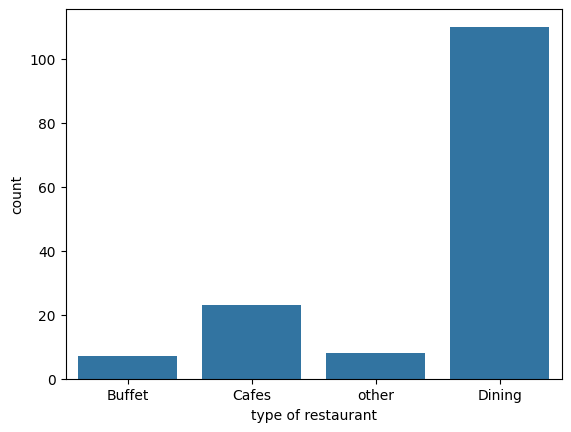

In [ ]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of restaurant")

### Conclusion- majority of the restaurant falls in dining section

### HOW MANY VOTES HAS EACH TYPE OF RESTAURENT RECIEVED FROM CUSTOMERS

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

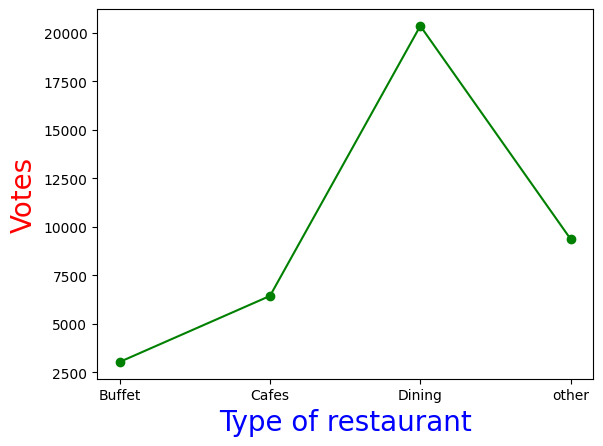

In [ ]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()           # grouping and suming both cols
result = pd.DataFrame({'votes': grouped_data})                        # passing the above grouped data i.e value into the key i.e votes
plt.plot(result, c = "green", marker= "o")                            # pass the result in green color + marker is the dots in dotted
plt.xlabel("Type of restaurant", c = "blue", size=20)                  # x axis heading name, clr, size
plt.ylabel("Votes", c="red", size=20)                                 # t axis heading name, clr, size

**conclusion : dining restaurents received max votes**

### What are the ratings that the majority of restaurants have received

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


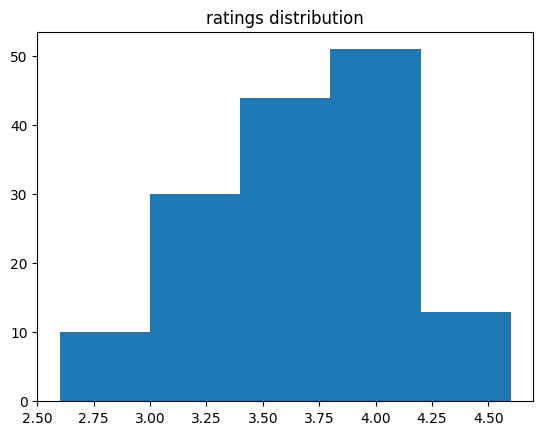

In [ ]:
plt.hist(df['rate'], bins =5)     # type of graph histograph, passing rate col and no of bars fr btr understanding
plt.title("ratings distribution") #graph title
plt.show()

**conclusion: majority restaurnets recievd rating from 3.5 to 4**

### ZOMATO HAS OBSERVED THAT MOST COUPLES ORDER MOST OF THEIR FOOD ONLINE. WHAT IS THE AVERAGE SPENDING ON EACH ORDER

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

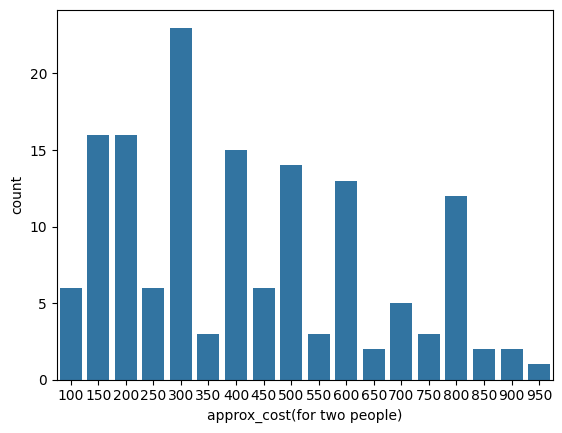

In [ ]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

**conclusion: the majority of couples prefer restaurants with an approx cost of 300 rupees**

### WHICH MODE (ONLINE OR OFFLINE) HAS RECEIVED MAXIMUM RATING?

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

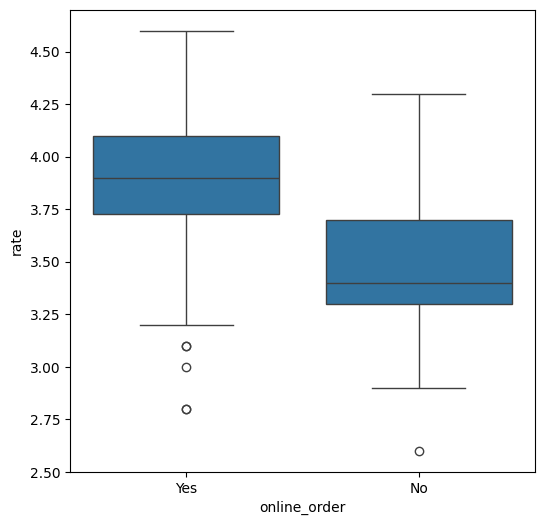

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order' , y = 'rate' , data = df)

**Conclusion: offline rating received lower ratings in comparision to online orders**